In [16]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#load dataset 
url = "https://raw.githubusercontent.com/FLIU253/machine-learning/master/spotify-mood-music-recommendations/Sample%20Data%20combined%20with%20master.csv?token=AGLVLQF5GP3TKMMXSBR6T2S557NNK"
names = ["acousticness", "danceability", "energy", "instrumentalness", "key", "liveness", "loudness", "mode", "speechiness", "tempo", "time_signature", "valence", "target", "song_title", "artist", "emotion"]
dataset = read_csv(url, names=names)

In [17]:
#shape
#Prints in row and column
print(dataset.shape)

(48, 16)


In [22]:
#head
print(dataset.head(5))

         acousticness  danceability  energy  instrumentalness  key  liveness  \
0.00898         0.612        188253  0.7990             0.000   10     0.172   
0.91800         0.331        507533  0.0861             0.902    5     0.106   
0.01750         0.564        220573  0.7370             0.000    9     0.054   
0.04810         0.603        202853  0.9440             0.000   11     0.342   
0.04580         0.704        201093  0.9280             0.000    8     0.345   

         loudness  mode  speechiness    tempo  time_signature  valence  \
0.00898    -4.603     1       0.0275  125.976               4    0.675   
0.91800   -21.226     1       0.0354  107.436               4    0.152   
0.01750    -4.079     1       0.0414  104.764               4    0.231   
0.04810    -3.626     0       0.3470  130.035               4    0.398   
0.04580    -3.422     1       0.0443  113.981               4    0.960   

         target         song_title             artist    emotion  
0.00898

In [21]:
# descriptions
print(dataset.describe())

       acousticness   danceability     energy  instrumentalness        key  \
count     48.000000      48.000000  48.000000         48.000000  48.000000   
mean       0.601604  242769.958333   0.651898          0.127526   4.562500   
std        0.168698   68690.785979   0.213286          0.266703   3.724024   
min        0.191000  169307.000000   0.086100          0.000000   0.000000   
25%        0.512250  201233.250000   0.511500          0.000000   1.000000   
50%        0.586500  218645.000000   0.670000          0.000006   4.500000   
75%        0.730500  259251.000000   0.808000          0.064725   8.000000   
max        0.890000  507533.000000   0.981000          0.921000  11.000000   

        liveness   loudness       mode  speechiness       tempo  \
count  48.000000  48.000000  48.000000    48.000000   48.000000   
mean    0.193327  -6.795604   0.791667     0.098410  124.005521   
std     0.137521   3.471636   0.410414     0.098909   29.034273   
min     0.051400 -21.226000  

In [19]:
#class distribution
print(dataset.groupby('emotion').size())

emotion
anxious        4
calm           6
contentment    6
depression     5
energetic      4
enraged        3
exuberant      6
frantic        7
happy          3
lonely         4
dtype: int64


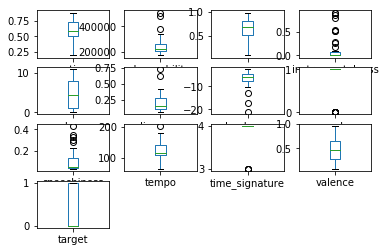

In [28]:
#box and whisker plots
dataset.plot(kind="box", subplots=True, layout=(4,4),sharex=False, sharey=False)
pyplot.show()

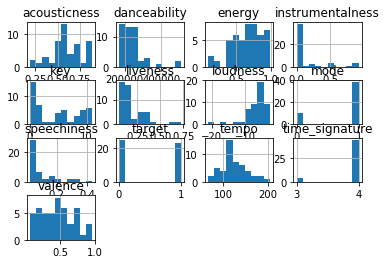

In [29]:
#histograms
dataset.hist()
pyplot.show()

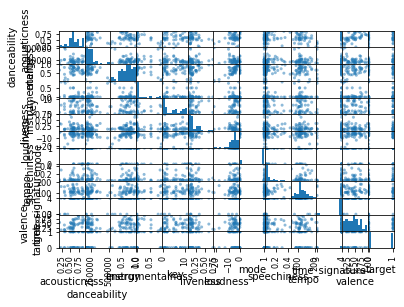

In [42]:
#scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [43]:
#Split-out validationd dataset
array = dataset.values
x = array[:,0:4]
y = array[:,4]
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.20, random_state=1)
